# Replicando el trabajo de KPSS (1992)

El test KPSS fue propuesto en

* Kwiatkowski, Phillips, Schmidt y Shin 1992 **Testing the null hypothesis of stationarity against the alternative of a unit root**. Journal of Econometrics 54, pp.159-178.

La idea del test es que las pruebas de Dickey-Fuller, al tener muy poca potencia para series persistentes pero sin raíz unitaria, terminan diagnosticando que muchas más series tienen raíz unitaria de las que efectivamente las tienen.

KPSS proponen una prueba en la que la hipótesis nula es que *la serie es estacionaria*.

Los autores estudian las mismas series que Nelson y Plosser, y llegan a resultados distintos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss

## Leer los datos y visualizarlos

### Definir ubicación de archivos de datos

In [3]:
datos = pd.read_stata('https://github.com/randall-romero/econometria/raw/master/data/NelsonPlosserData.dta')
datos.set_index('year',inplace=True)

In [4]:
variables = {'lrgnp':'Real GNP',
           'lgnp':'Nominal GNP',
           'lpcrgnp':'Real per capita GNP',
           'lip':'Industrial production',
           'lemp':'Employment', 
           'lun':'Unemployment rate',
           'lprgnp':'GNP deflator',
           'lcpi':'Consumer prices',
           'lwg':'Wages',
           'lrwg':'Real wages', 
           'lm':'Money stock', 
           'lvel':'Velocity',
           'bnd':'Bond yield',
           'lsp500':'Common stock prices'}

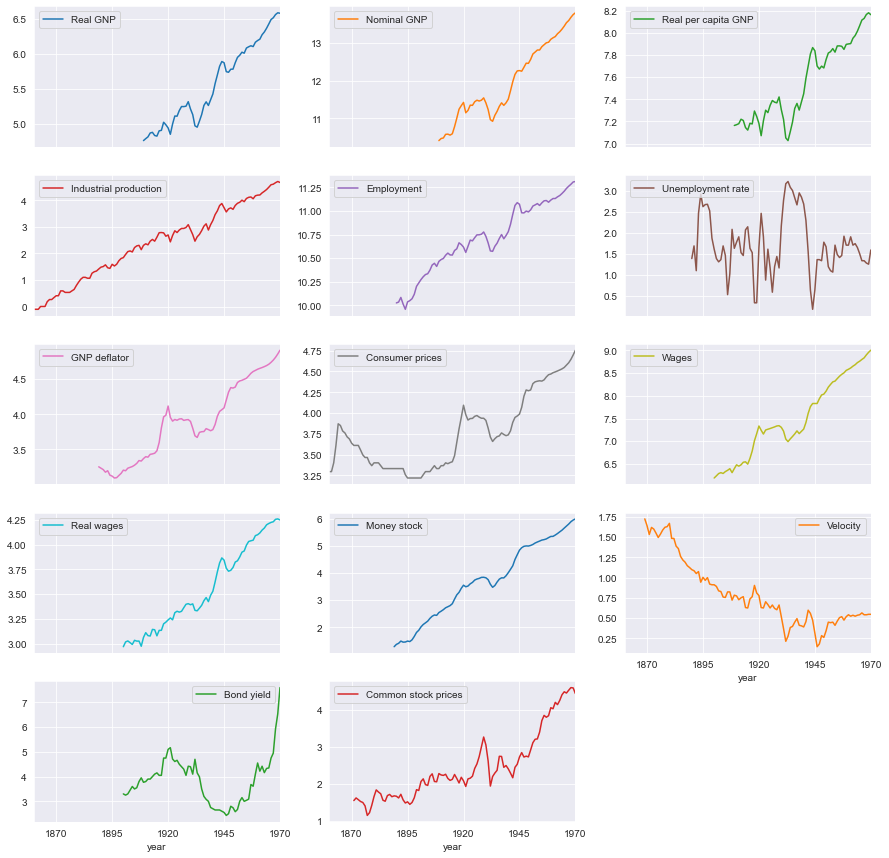

In [5]:
datos = datos[variables.keys()].rename(columns=variables)
datos.plot(subplots=True, figsize=[15,15], layout=[-1,3]);

![KPSS tabla 5](KPSS-table5.png)

## Calculando los resultados de las pruebas

In [6]:
def KPSS_una_serie(nombre_variable, tipo):
    """
    Calcula los estadísticos LM de la prueba de estacionariedad KPSS, con rezagos de 0 a 8
     
    Args:
        nombre_variable: str, el nombre de una columna de la tabla "datos"
        tipo: str, tipo de prueba a realizar, "c" o "ct"

    Returns:
        np.array, los 9 estadísticos LM estimados
    """
    return [kpss(datos[nombre_variable].dropna(), regression=tipo, lags=k)[0] for k in range(9)]   

In [7]:
KPSS_una_serie('Real GNP', 'c')

C:\Users\randa\AppData\Local\Temp/ipykernel_10952/1869391183.py:12: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  return [kpss(datos[nombre_variable].dropna(), regression=tipo, lags=k)[0] for k in range(9)]
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

[5.9600803140075245,
 3.055244065904038,
 2.080582549489867,
 1.593138878510747,
 1.3008342896960823,
 1.1062335280066273,
 0.9675596555242384,
 0.8639385094254106,
 0.7837076252625362]

In [8]:
def KPSS(tipo):
    """
    Calcula los estadísticos LM de la prueba de estacionariedad KPSS, con rezagos de 0 a 8, para
    todas las series de la tabla "datos"
     
    Args:
        tipo: str, tipo de prueba a realizar, "c" o "ct"

    Returns:
        pd.DataFrame, series en filas, número de rezagos en columnas
    """    
    return pd.DataFrame([KPSS_una_serie(ser, tipo=tipo) for ser in variables.values()], index=variables.values())

In [9]:
%%capture
tabla5_kpss = pd.concat([KPSS('c'), KPSS('ct')], keys=['c', 'ct']).round(3)

In [10]:
tabla5_kpss

0      1      2      3      4      5      6  \
c  Real GNP                5.960  3.055  2.081  1.593  1.301  1.106  0.968   
   Nominal GNP             5.811  2.985  2.035  1.560  1.276  1.086  0.951   
   Real per capita GNP     5.539  2.845  1.944  1.495  1.225  1.046  0.918   
   Industrial production  10.786  5.478  3.698  2.807  2.273  1.916  1.661   
   Employment              7.573  3.872  2.630  2.008  1.635  1.387  1.211   
   Unemployment rate       0.314  0.179  0.136  0.114  0.102  0.095  0.090   
   GNP deflator            7.510  3.822  2.587  1.968  1.598  1.351  1.176   
   Consumer prices         7.904  4.027  2.729  2.080  1.690  1.430  1.243   
   Wages                   6.717  3.434  2.331  1.779  1.448  1.227  1.070   
   Real wages              6.957  3.547  2.402  1.829  1.485  1.257  1.094   
   Money stock             8.006  4.079  2.760  2.100  1.704  1.441  1.253   
   Velocity                8.400  4.290  2.908  2.214  1.797  1.518  1.318   
   Bond yield              0.780  0.424  0.300  0.238  0.200  0.175  0.157   
   Common stock prices     8.014  4.099  2.789  2.134  1.741  1.479  1.292   
ct Real GNP                0.630  0.337  0.242  0.198  0.173  0.158  0.148   
   Nominal GNP             0.755  0.392  0.273  0.215  0.181  0.159  0.143   
   Real per capita GNP     0.528  0.283  0.204  0.167  0.147  0.134  0.126   
   Industrial production   0.822  0.446  0.320  0.257  0.220  0.196  0.179   
   Employment              0.526  0.278  0.198  0.158  0.136  0.122  0.112   
   Unemployment rate       0.216  0.124  0.094  0.079  0.071  0.066  0.063   
   GNP deflator            0.492  0.256  0.178  0.140  0.117  0.103  0.093   
   Consumer prices         1.853  0.943  0.641  0.490  0.401  0.342  0.301   
   Wages                   0.612  0.316  0.220  0.173  0.145  0.128  0.115   
   Real wages              0.956  0.511  0.365  0.293  0.252  0.226  0.208   
   Money stock             0.445  0.228  0.158  0.124  0.104  0.092  0.083   
   Velocity                1.776  0.932  0.647  0.504  0.418  0.360  0.319   
   Bond yield              0.845  0.457  0.322  0.255  0.214  0.186  0.166   
   Common stock prices     1.228  0.646  0.454  0.359  0.302  0.264  0.237   

                              7      8  
c  Real GNP               0.864  0.784  
   Nominal GNP            0.851  0.773  
   Real per capita GNP    0.822  0.748  
   Industrial production  1.471  1.322  
   Employment             1.080  0.978  
   Unemployment rate      0.087  0.086  
   GNP deflator           1.045  0.944  
   Consumer prices        1.103  0.994  
   Wages                  0.953  0.862  
   Real wages             0.972  0.878  
   Money stock            1.112  1.003  
   Velocity               1.168  1.051  
   Bond yield             0.143  0.133  
   Common stock prices    1.152  1.043  
ct Real GNP               0.141  0.137  
   Nominal GNP            0.132  0.124  
   Real per capita GNP    0.121  0.118  
   Industrial production  0.166  0.155  
   Employment             0.105  0.101  
   Unemployment rate      0.061  0.060  
   GNP deflator           0.086  0.081  
   Consumer prices        0.270  0.246  
   Wages                  0.107  0.101  
   Real wages             0.194  0.184  
   Money stock            0.078  0.075  
   Velocity               0.287  0.262  
   Bond yield             0.151  0.139  
   Common stock prices    0.216  0.199

## Añadiendo asteriscos para indicar significancia de la prueba

In [11]:
critical = pd.DataFrame(
    {'c': np.array([0.347, 0.463, 0.574, 0.739]),
     'ct':np.array([0.119, 0.146, 0.176, 0.216])},
    index=['10%', '5%', '2.5%', '1%'])

formatos = {'c':'%.2f', 'ct':'%.3f'}

In [12]:
critical

,c,ct
10%,0.347,0.119
5%,0.463,0.146
2.5%,0.574,0.176
1%,0.739,0.216


In [13]:
def significancia(v, tipo):
    """
    Contar cuántos valores críticos KPSS fueron superados por un estimado 
    Args:
        v: float, el estadístico LM estimado de una prueba KPSS
        tipo: str, tipo de prueba realizada, "c" o "ct"

    Returns:
        int: 4 (signficativa al 1%), 3 (signficativa al 2.5%), 2 (signficativa al 5%), 
             1 (signficativa al 10%), 0 (no signficativa al 10%)
    """
    return (v > critical[tipo]).sum()

In [14]:
def estrellas(v, tipo):
    """
    Escribir coeficiente LM de prueba KPSS con estrellas de significancia:
    **** (signficativa al 1%), ***_ (signficativa al 2.5%), **__ (signficativa al 5%), 
    *___ (signficativa al 10%), ____ (no signficativa al 10%)
    
    Args:
        v: float, el estadístico LM estimado de una prueba KPSS
        tipo: str, tipo de prueba realizada, "c" o "ct"

    Returns:
        str, coeficiente LM con *** (variable, según significancia)
    """
    ns = significancia(v, tipo)
    return (formatos[tipo] % v) + '*' * ns + ' '*(4-ns)

In [15]:
estrellas(0.15, 'c')

'0.15    '

In [16]:
def KPSS_tabla(tipo):
    """
    Replica la tabla 5 del artículo de KPSS, mostrando resultados de pruebas de estacionariedad
    aplicadas a las series de Nelson y Plosser (1982)
    
    Args:
        tipo: str, tipo de prueba realizada, "c" o "ct"

    Returns:
        pd.DataFrame, series en filas, número de rezagos en columnas, pero resultados
        son strings anotados con asteriscos de significancia
    """
    return KPSS(tipo).applymap(lambda x: estrellas(x,tipo))

In [17]:
%%capture
tabla5_kpss_star = pd.concat([KPSS_tabla('c'), KPSS_tabla('ct')], keys=['c', 'ct']).round(3)

In [18]:
tabla5_kpss_star

0          1          2          3  \
c  Real GNP                5.96****   3.06****   2.08****   1.59****   
   Nominal GNP             5.81****   2.99****   2.04****   1.56****   
   Real per capita GNP     5.54****   2.84****   1.94****   1.49****   
   Industrial production  10.79****   5.48****   3.70****   2.81****   
   Employment              7.57****   3.87****   2.63****   2.01****   
   Unemployment rate       0.31       0.18       0.14       0.11       
   GNP deflator            7.51****   3.82****   2.59****   1.97****   
   Consumer prices         7.90****   4.03****   2.73****   2.08****   
   Wages                   6.72****   3.43****   2.33****   1.78****   
   Real wages              6.96****   3.55****   2.40****   1.83****   
   Money stock             8.01****   4.08****   2.76****   2.10****   
   Velocity                8.40****   4.29****   2.91****   2.21****   
   Bond yield              0.78****   0.42*      0.30       0.24       
   Common stock prices     8.01****   4.10****   2.79****   2.13****   
ct Real GNP               0.630****  0.337****  0.242****  0.198***    
   Nominal GNP            0.755****  0.392****  0.273****  0.215***    
   Real per capita GNP    0.528****  0.283****  0.204***   0.167**     
   Industrial production  0.822****  0.446****  0.320****  0.257****   
   Employment             0.526****  0.278****  0.198***   0.158**     
   Unemployment rate      0.216****  0.124*     0.094      0.079       
   GNP deflator           0.492****  0.256****  0.178***   0.140*      
   Consumer prices        1.853****  0.943****  0.641****  0.490****   
   Wages                  0.612****  0.316****  0.220****  0.173**     
   Real wages             0.956****  0.511****  0.365****  0.293****   
   Money stock            0.445****  0.228****  0.158**    0.124*      
   Velocity               1.776****  0.932****  0.647****  0.504****   
   Bond yield             0.845****  0.457****  0.322****  0.255****   
   Common stock prices    1.228****  0.646****  0.454****  0.359****   

                                  4          5          6          7  \
c  Real GNP                1.30****   1.11****   0.97****   0.86****   
   Nominal GNP             1.28****   1.09****   0.95****   0.85****   
   Real per capita GNP     1.23****   1.05****   0.92****   0.82****   
   Industrial production   2.27****   1.92****   1.66****   1.47****   
   Employment              1.64****   1.39****   1.21****   1.08****   
   Unemployment rate       0.10       0.09       0.09       0.09       
   GNP deflator            1.60****   1.35****   1.18****   1.04****   
   Consumer prices         1.69****   1.43****   1.24****   1.10****   
   Wages                   1.45****   1.23****   1.07****   0.95****   
   Real wages              1.49****   1.26****   1.09****   0.97****   
   Money stock             1.70****   1.44****   1.25****   1.11****   
   Velocity                1.80****   1.52****   1.32****   1.17****   
   Bond yield              0.20       0.18       0.16       0.14       
   Common stock prices     1.74****   1.48****   1.29****   1.15****   
ct Real GNP               0.173**    0.158**    0.148**    0.141*      
   Nominal GNP            0.181***   0.159**    0.143*     0.132*      
   Real per capita GNP    0.147**    0.134*     0.126*     0.121*      
   Industrial production  0.220****  0.196***   0.179***   0.166**     
   Employment             0.136*     0.122*     0.112      0.105       
   Unemployment rate      0.071      0.066      0.063      0.061       
   GNP deflator           0.117      0.103      0.093      0.086       
   Consumer prices        0.401****  0.342****  0.301****  0.270****   
   Wages                  0.145*     0.128*     0.115      0.107       
   Real wages             0.252****  0.226****  0.208***   0.194***    
   Money stock            0.104      0.092      0.083      0.078       
   Velocity               0.418****  0.360****  0.319****  0.287****   
 

## Visualizando los resultados con un mapa de calor

In [19]:
def KPSS_heatmap(tipo, ax):
    """
    Crea un mapa de calor (heatmap) para visualizar los resultados de la tabla 5 de KPSS
     
    Args:
        tipo: str, tipo de prueba realizada, "c" o "ct"
        ax: axis de matplotlib.pyplot, eje cartesiano donde se grafican los resultados

    Returns:
        una imagen. La figura queda dibujada en el parámetro ax
    """
    tabla = KPSS(tipo).applymap(lambda x: significancia(x, tipo))
    return ax.imshow(tabla, cmap='Blues', aspect='auto')

In [20]:
def KPSS_heatmap(tipo, ax):
    tabla = KPSS(tipo).applymap(lambda x: significancia(x, tipo))
    return ax.imshow(tabla, cmap='Blues', aspect='auto')

In [21]:
%%capture
fig, axs = plt.subplots(1,2, figsize=[16,6], sharey=True)
im0 = KPSS_heatmap('c', axs[0])  #axs[0].imshow(tabla_kpss_c, cmap='Blues', aspect='auto')
im1 = KPSS_heatmap('ct', axs[1]) #axs[1].imshow(tabla_kpss_ct,cmap='Blues', aspect='auto')

axs[0].set(
    title='Estacionaria alrededor de una media',
    xlabel='rezagos', 
    yticks=np.arange(len(variables)), 
    yticklabels=[''] * len(variables));

axs[1].set(
    title='Estacionaria alrededor de una tendencia',
    xlabel='rezagos',
    yticks=np.arange(len(variables)), 
    yticklabels=variables.values());
    
for ax in axs:
    ax.vlines(0.5 + np.arange(8), -0.5,13.5,'gray')
    ax.hlines(0.5 + np.arange(14), -0.5,8.5,'gray')
    

axlegend = fig.add_axes([0.495,0.4, 0.035,0.4])
axlegend.imshow(np.arange(5).reshape(5,1), cmap='Blues', aspect='auto')
axlegend.set(xticks=[], yticks=[], title='Leyenda')
for k, v in enumerate(critical.index[:-1]):
    axlegend.annotate(v, [0, 1+k],ha='center')

axlegend.annotate(critical.index[-1], [0, k+2],color='yellow',ha='center')    
axlegend.annotate('I(0)', [0, 0],ha='center')

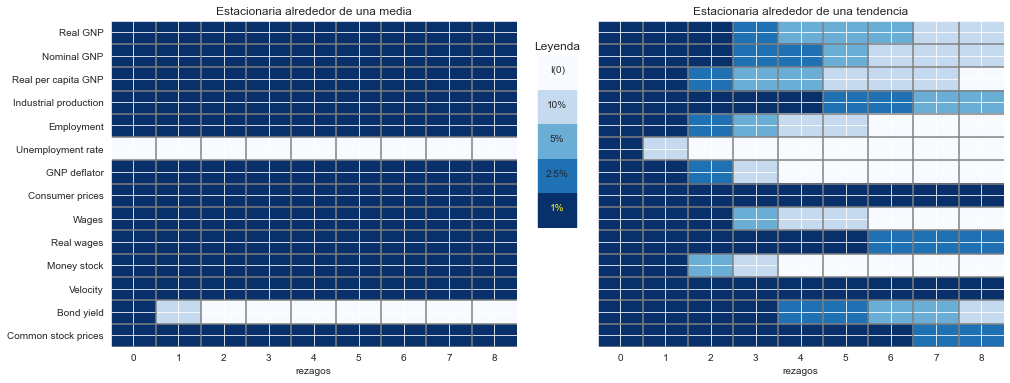

In [22]:
fig.savefig('NelsonPlosser-KPSS.pdf', bbox_inches='tight')
fig